In [39]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from adspy_shared_utilities import *

# dataset used for classification is iris data with 3 classes
#from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

In [40]:
# Data(174): 174 participants and columns(31): Q1 - Q29 ,Happiness score and Happiness class
# Class: 1 = not particularly happy, 2 = moderate happy, 3 = too happy
df = pd.read_excel('ml_data.xlsx', index_col= 'Participants')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Happiness score,Happiness class
Participants,,,,,,,,,,,,,,,,,,,,,
1,0.650000,0.20,0.077778,0.350000,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,...,0.20,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,0.162261,1
2,0.800000,0.80,0.800000,0.077778,0.650000,0.350000,0.200000,0.200000,0.800000,0.350000,...,0.20,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.381992,2
3,0.650000,0.35,0.350000,0.200000,0.200000,0.650000,0.350000,0.650000,0.350000,0.800000,...,0.65,0.800000,0.350000,0.350000,0.350000,0.200000,0.200000,0.200000,0.427586,2
4,0.077778,0.80,0.077778,0.200000,0.650000,0.077778,0.800000,0.200000,0.077778,0.200000,...,0.20,0.200000,0.077778,0.077778,0.200000,0.077778,0.200000,0.200000,0.229310,1
5,0.650000,0.80,0.077778,0.200000,0.350000,0.077778,0.077778,0.800000,0.077778,0.200000,...,0.20,0.650000,0.350000,0.200000,0.200000,0.200000,0.650000,0.922222,0.359962,2


### Splitting of Data into Train and Test:

In [4]:
X_data = df.iloc[:,:30]
y_target = df.iloc[:,-1]
print('Size of Dataset: ',X_data.shape)
print('Target of Dataset: ', y_target.shape )
print('Feature names of  Dataset: ',df.columns)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 3)
#print(X_train, y_train)
#print(X_test, y_test)

Size of Dataset:  (174, 30)
Target of Dataset:  (174,)
Feature names of  Dataset:  Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29',
       'Happiness score', 'Happiness class'],
      dtype='object')


### Selection of Model:

- KNN CLASSIFIER

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(estimator = knn, param_grid = params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_train, y_train)

#save best model
knn_b = knn_gs.best_estimator_
print(knn_b)
#check best n_neigbors value
knn_param = knn_gs.best_params_
print(knn_param)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')
{'n_neighbors': 11}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


- SVM CLASSIFIER

In [42]:
from sklearn.svm import SVC

#create a new random forest classifier
svm = SVC()
#create a dictionary of all values we want to test for n_estimators
params_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear','poly','rbf'], 
              'probability': [True]}
#use gridsearch to test all values for n_estimators
svm_gs = GridSearchCV(estimator = svm, param_grid = params_svm, cv=5)
#fit model to training data
svm_gs.fit(X_train, y_train)

#save best model
svm_b = svm_gs.best_estimator_
print(svm_b)
#check best n_neigbors value
svm_param = svm_gs.best_params_
print(svm_param)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
{'C': 1, 'gamma': 1, 'kernel': 'linear', 'probability': True}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


- DECISION TREE CLASSIFIER

In [48]:
from sklearn.tree import DecisionTreeClassifier

#create a new random forest classifier
dt = DecisionTreeClassifier()
#create a dictionary of all values we want to test for n_estimators
params_dt = {'n_estimators' : [], 'max_depth': np.arange(1,7), 'max_features': np.arange(1,28)}
#use gridsearch to test all values for n_estimators
dt_gs = GridSearchCV(estimator = dt, param_grid = params_dt, cv=5)
#fit model to training data
dt_gs.fit(X_train, y_train)

#save best model
dt_b = dt_gs.best_estimator_
print(dt_b)
#check best n_neigbors value
dt_param = dt_gs.best_params_
print(dt_param)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=26, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
{'max_depth': 2, 'max_features': 26}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Model Plotting:

<IPython.core.display.Javascript object>


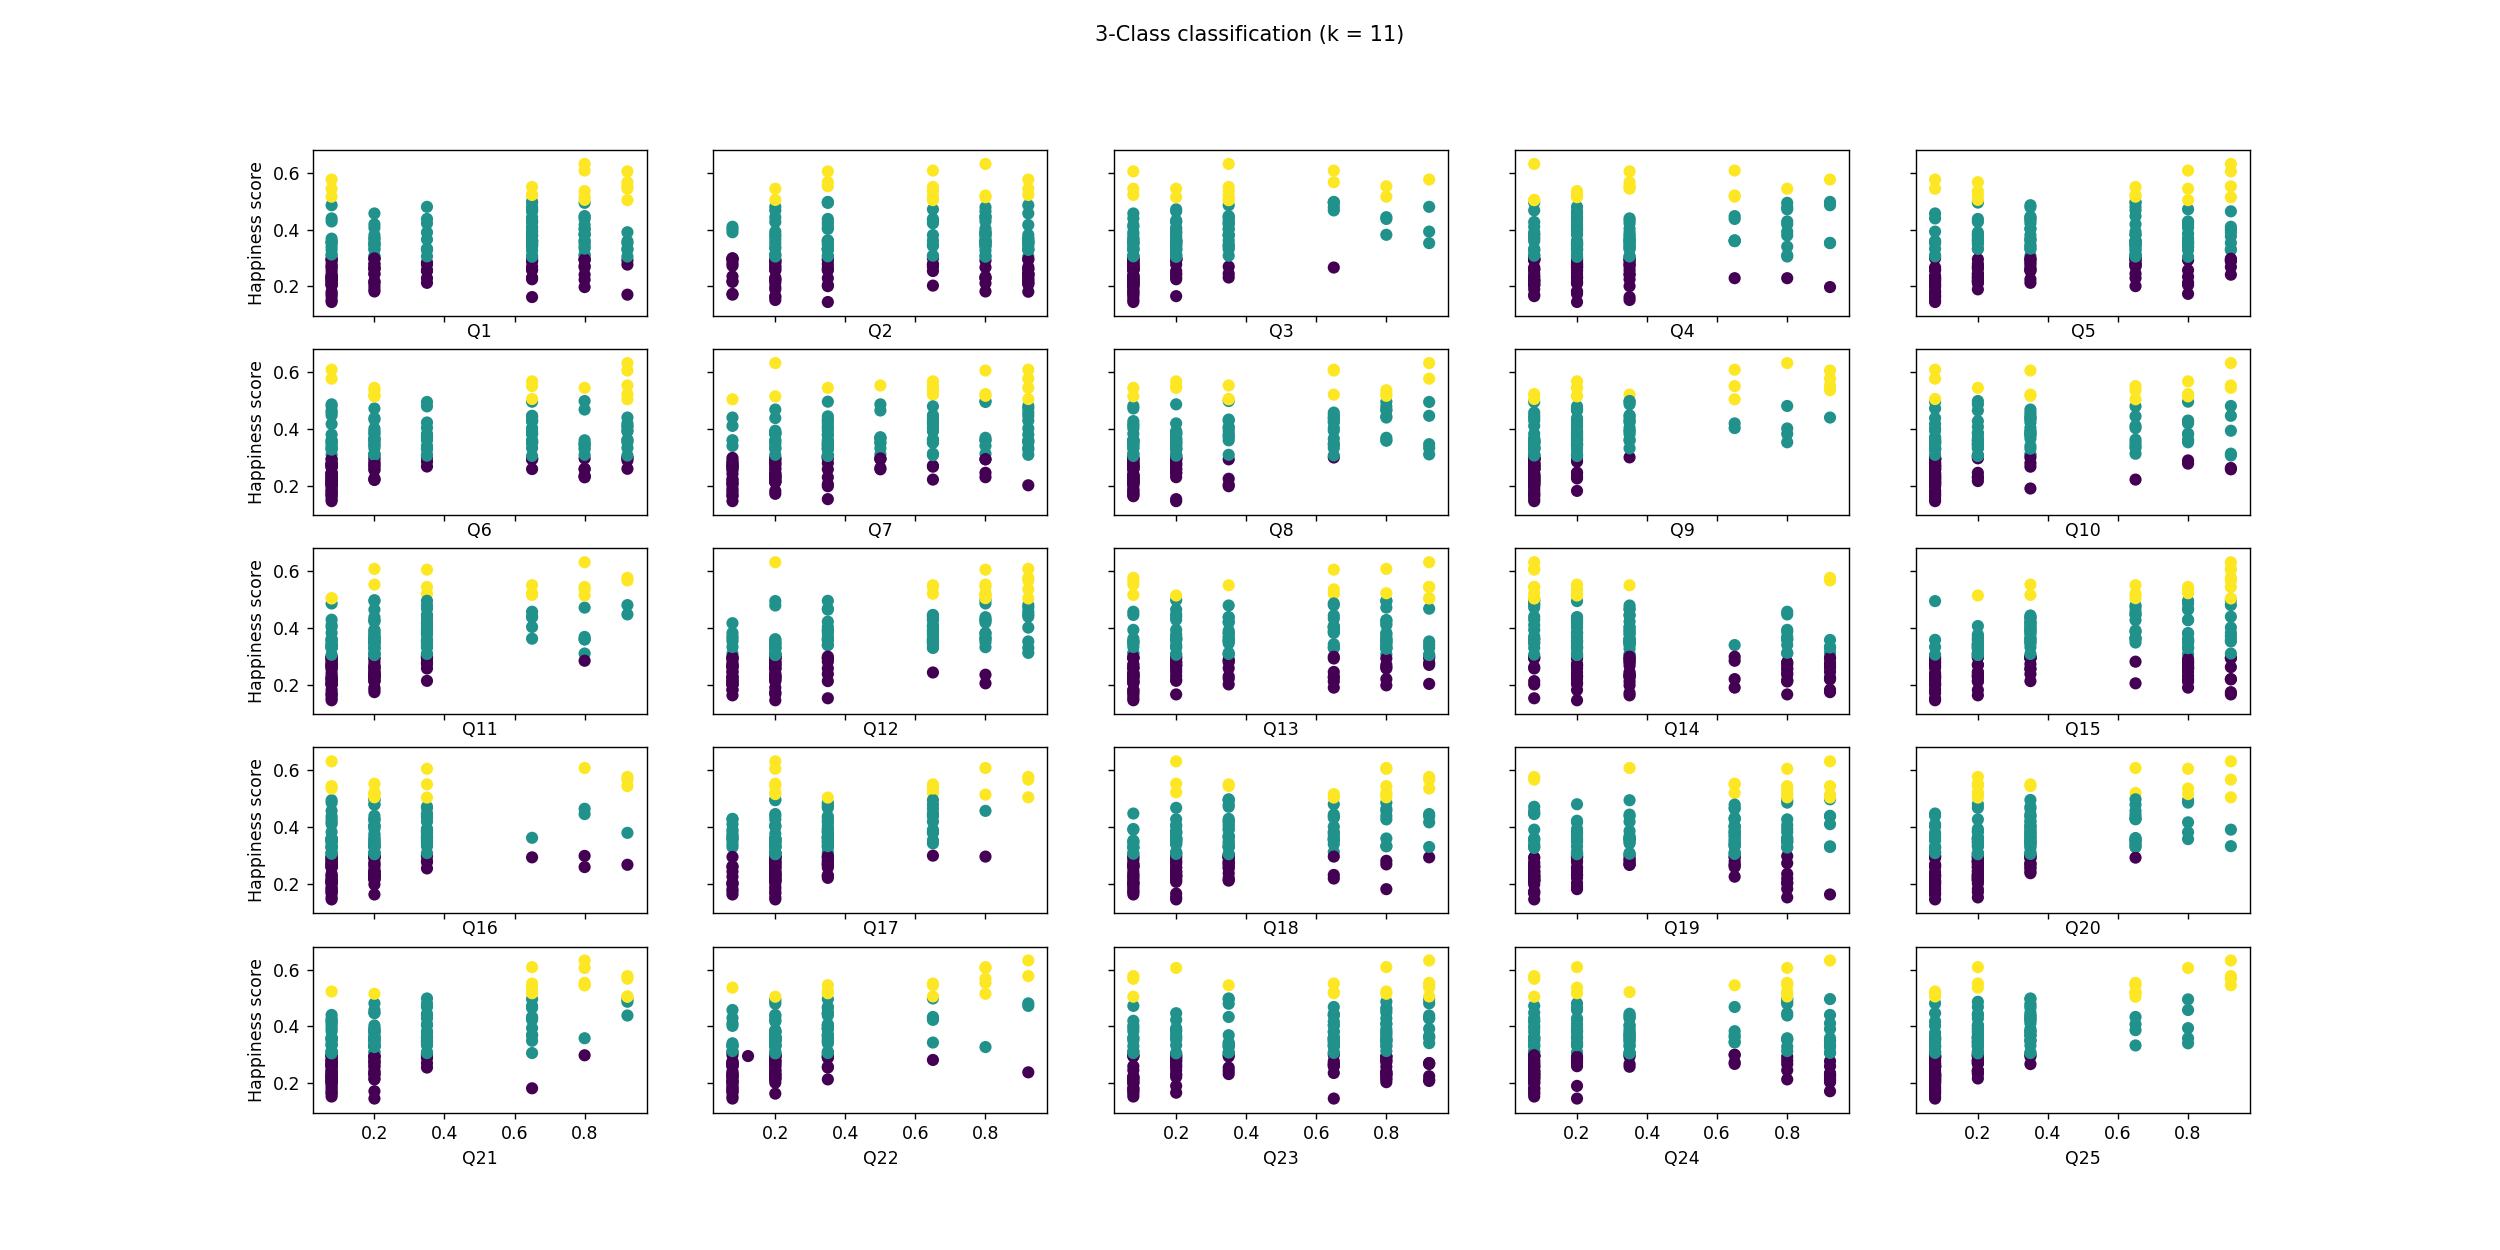

In [33]:
def knn_plot():
    n_neighbors = knn_param['n_neighbors']
  
    fig, axs = plt.subplots(5,5, figsize=(20, 10), sharex=True, sharey=True)
    fig.suptitle("3-Class classification (k = %i)"%(n_neighbors))
    
    for i, ax in enumerate(axs.flat):
        ax.scatter(X_data.iloc[:,i], X_data.iloc[:,29], c=y_target)
        ax.set(xlabel=df.columns[i])

    # set labels
    plt.setp(axs[:, 0], ylabel='Happiness score')
    
    plt.savefig('knn.png', dpi=300)
    

#knn_plot()

In [9]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

def svm_plot():
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = X_data.iloc[:, [0,29]]
    y = y_target

    # we create an instance of SVM and fit out data. We do not scale our data, since we want to plot the support vectors
    model = svm_b.fit(X, y)

    # title for the plots
    title = 'SVC with linear kernel'
    
    # Set-up plotting.
    plt.figure()
    
    X0, X1 = X.iloc[:, 0], X.iloc[:, 1]

    xx, yy = make_meshgrid(X0, X1)

    plot_contours(model, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
    
    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    #plt.xlim(xx.min(), xx.max())
    #plt.ylim(yy.min(), yy.max())
    plt.xlabel('Q1')
    plt.ylabel('Happiness score')
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

    plt.show()

#svm_plot()

### KNN Classification

In [44]:
# model 1
def model1():
    from sklearn.metrics import accuracy_score, classification_report
    from sklearn.neighbors import KNeighborsClassifier
    
    print('Accuracy of K-NN classifier on training set: {:.2f}'
         .format(knn_b.score(X_train, y_train)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'
         .format(knn_b.score(X_test, y_test)))
        
    return(accuracy_score(y_test,knn_b.predict(X_test)))

model1()

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.85


0.8490566037735849

### SVM Classifier

In [45]:
# model 2
def model2():
    from sklearn.metrics import accuracy_score, classification_report
    from sklearn.svm import SVC

    '''
    v_train = []
    v_test = []
    a_test = []
    for i in range(29):
        v_train.append(svm_b.score(X_train.iloc[:,[i,29]], y_train))
        v_test.append(svm_b.score(X_test.iloc[:,[i,29]], y_test))
        a_test.append(accuracy_score(y_test,svm_b.predict(X_test.iloc[:,[i,29]])))
        
    avg_train = np.mean(v_train)
    avg_test = np.mean(v_test)
    act_test = np.mean(a_test)
    '''
    
    print('Accuracy of SVM classifier on training set: {:.2f}'
         .format(svm_b.score(X_train, y_train)))
    print('Accuracy of SVM classifier on test set: {:.2f}'
         .format(svm_b.score(X_test, y_test)))
     
    return (accuracy_score(y_test,svm_b.predict(X_test)))
    #return act_test
    
model2()

Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.89


0.8867924528301887

### DecisionTree Classifier

In [57]:
#model 3
def model3():
    from sklearn.metrics import accuracy_score, classification_report
    from sklearn.tree import DecisionTreeClassifier

    print('Accuracy of Decision Tree classifier on training set: {:.2f}'
         .format(dt_b.score(X_train, y_train)))
    print('Accuracy of Decision Tree classifier on test set: {:.2f}'
         .format(dt_b.score(X_test, y_test)))
    
    return (accuracy_score(y_test,dt_b.predict(X_test)))

model3()

Accuracy of Decision Tree classifier on training set: 0.94
Accuracy of Decision Tree classifier on test set: 0.89


0.8867924528301887

### Ensemble model

In [56]:
test_score = []

def ensemble_model(test_score):
    
    test_score.append(model1())
    test_score.append(model2())
    test_score.append(model3())
    
    #Average prediction of ensemble model with (w1,w2,w3) = 0.333
    predict = np.mean(test_score)
    
    return(predict)

ensemble_model(test_score)

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.85
Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.89
Accuracy of Decision Tree classifier on training set: 0.94
Accuracy of Decision Tree classifier on test set: 0.89


0.8742138364779874

### Genetic Alogrithms for Optimization:

In [54]:
import genetic
import numpy

"""
Given the following function:
    y = f(w1:w3) = w1*x1 + w2*x2 + w3*x3 ;
    Where (x1,x2,x3)=(0.85,0.89,0.89) and y=1.0
What are the best values for the 3 weights (w1 to w3)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = test_score # Function inputs

desired_output = 1.0 # Function output

def fitness_func(solution, solution_idx):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)/3
    fitness = 1/numpy.abs(desired_output - output)
    return fitness

fitness_function = fitness_func # Fitness Function

num_generations = 100 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 30  # Number of solutions in the population.
num_genes = len(function_inputs) # Number of genes in a chromosome 

init_range_low = 0.0
init_range_high = 1.0
# types of parent selection
# sss = steady_state_selection, rws = roulette_wheel_selection, tournament = tournament_selection

parent_selection_type = "tournament" # Type of parent selection. 
keep_parents = 5 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

crossover_type = "single_point" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 10 # Percentage of genes to mutate.

last_fitness = 0

def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = genetic.GA(num_generations= num_generations,
                       num_parents_mating= num_parents_mating, 
                       fitness_func= fitness_function,
                       sol_per_pop= sol_per_pop, 
                       num_genes= num_genes,
                       init_range_low= init_range_low,
                       init_range_high= init_range_high,
                       parent_selection_type= parent_selection_type,
                       keep_parents= keep_parents,
                       crossover_type= crossover_type,
                       mutation_type= mutation_type,
                       mutation_percent_genes= mutation_percent_genes,
                       callback_generation= callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
Generation = 1
Fitness    = 6.884936211239672
Change     = 6.884936211239672
Generation = 2
Fitness    = 31.65410964056912
Change     = 24.76917342932945
Generation = 3
Fitness    = 494.2839890149
Change     = 462.62987937433087
Generation = 4
Fitness    = 494.2839890149
Change     = 0.0
Generation = 5
Fitness    = 494.2839890149
Change     = 0.0
Generation = 6
Fitness    = 494.2839890149
Change     = 0.0
Generation = 7
Fitness    = 494.2839890149
Change     = 0.0
Generation = 8
Fitness    = 494.2839890149
Change     = 0.0
Generation = 9
Fitness    = 494.2839890149
Change     = 0.0
Generation = 10
Fitness    = 494.2839890149
Change     = 0.0
Generation = 11
Fitness    = 494.2839890149
Change     = 0.0
Generation = 12
Fitness    = 494.2839890149
Change     = 0.0
Generation = 13
Fitness    = 494.2839890149
Change     =

### Result Summary:

Parameters of the best solution : [0.9621577  1.45797151 1.00392052]
Parameters of the best weighted solution : [0.28099992 0.42580325 0.29319683]
Fitness value of the best solution = 26405.22755924958
Best fitness value reached after 64 generations.


<IPython.core.display.Javascript object>


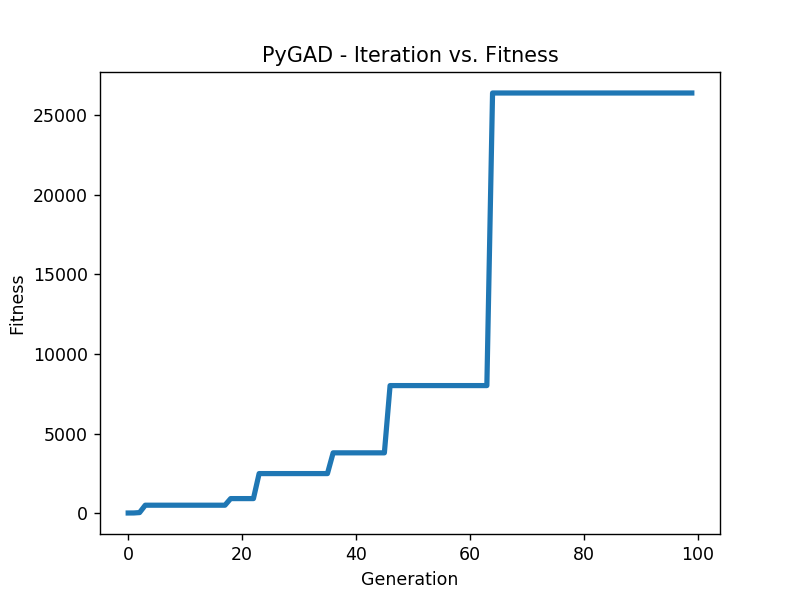


Predicted output based on the best solution : 0.8761886822590206


In [55]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()

wt_solution = solution/np.sum(solution)

print("Parameters of the best solution : {solution}".format(solution=solution))
print("Parameters of the best weighted solution : {solution}".format(solution=wt_solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations."
          .format(best_solution_generation=ga_instance.best_solution_generation))
    
# After the generations complete, showing plot that summarize how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Best_Output = (w1*x1 +  w2*x2 + w3*x3)/3
prediction = numpy.sum(numpy.array(function_inputs)*wt_solution)
print("\nPredicted output based on the best solution : {prediction}".format(prediction=prediction))